In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
x = np.linspace(0,50,501)

In [5]:
y = np.sin(x)

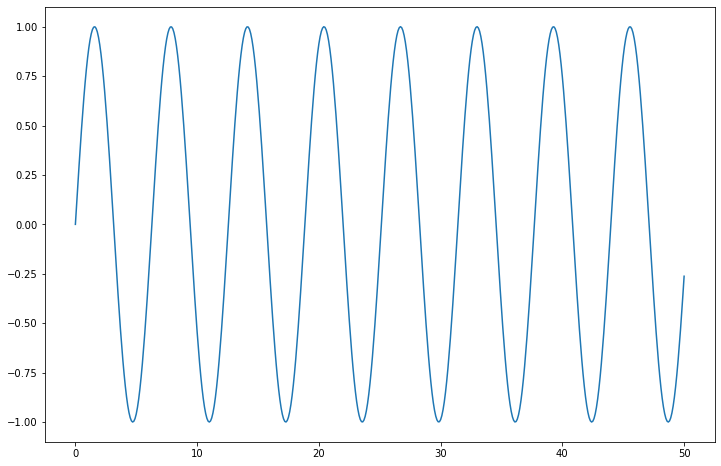

In [7]:
plt.plot(x,y)

In [8]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [9]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [10]:
testPercent = 0.1

In [11]:
len(df)

501

In [12]:
len(df) * testPercent

50.1

In [13]:
testPoint = np.round(len(df) * testPercent)

In [14]:
testPoint

50.0

In [15]:
testIndex = int(len(df)-testPoint)

In [16]:
testIndex

451

In [17]:
train = df.iloc[:testIndex]
test = df.iloc[testIndex:]

In [18]:
train.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [19]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaledTrain = scaler.fit_transform(train)

In [25]:
scaledTest = scaler.transform(test)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [29]:
length = 2
batchSize = 1

generator = TimeseriesGenerator(scaledTrain, scaledTrain, length= length, batch_size=batchSize)

In [30]:
len(scaledTrain)

451

In [31]:
len(generator)

449

In [33]:
X, y = generator[0]

In [38]:
X[0]

array([[0.49999912],
       [0.54991622]])

In [36]:
y

array([[0.59933458]])

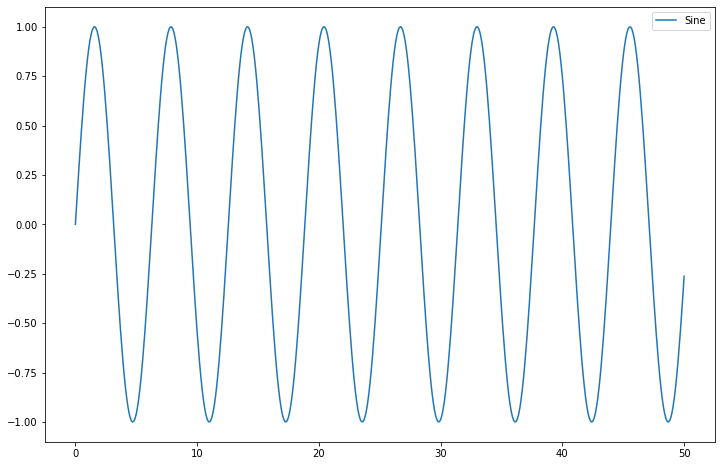

In [40]:
df.plot()

In [41]:
length = 50
batchSize = 1

generator = TimeseriesGenerator(scaledTrain, scaledTrain, length= length, batch_size=batchSize)

In [42]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [43]:
n_feature = 1

In [44]:
model = Sequential([
    SimpleRNN(units=50, input_shape=(length, n_feature)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 10s 25ms/step - loss: 0.0052
Epoch 2/5
401/401 [==============================] - 8s 21ms/step - loss: 9.1174e-05
Epoch 3/5
401/401 [==============================] - 9s 22ms/step - loss: 4.0981e-04
Epoch 4/5
401/401 [==============================] - 10s 26ms/step - loss: 3.7668e-04
Epoch 5/5
401/401 [==============================] - 11s 27ms/step - loss: 2.5392e-05


In [47]:
losses = pd.DataFrame(model.history.history)

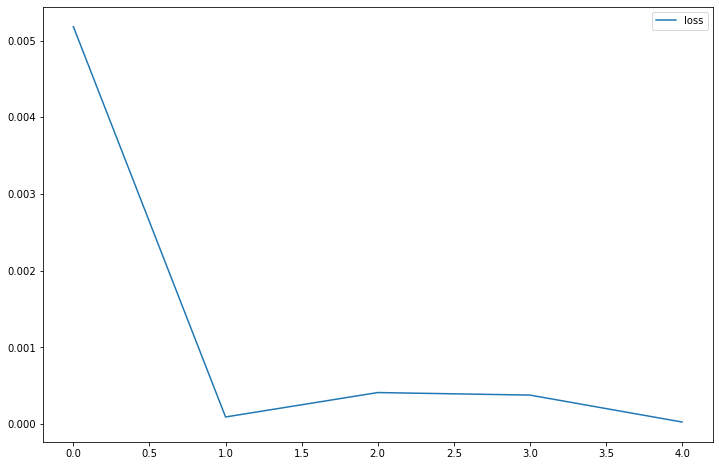

In [49]:
losses.plot()

In [50]:
first_eval_batch = scaledTrain[-length:]

In [52]:
first_eval_batch = first_eval_batch.reshape(1,length, n_feature)

In [53]:
model.predict(first_eval_batch)

array([[0.9510613]], dtype=float32)

In [55]:
model.predict(first_eval_batch)[0][0]

0.9510613

In [58]:
scaledTest[0]

array([0.94955134])

In [60]:
test_predictions = []

first_eval_batch = scaledTrain[-length:]
currentBatch = first_eval_batch.reshape(1,length, n_feature)

In [61]:
currentBatch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [62]:
test_predictions = []

first_eval_batch = scaledTrain[-length:]
currentBatch = first_eval_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    currentPrediction = model.predict(currentBatch)[0]
    test_predictions.append(currentPrediction)
    currentBatch = np.append(currentBatch[:,1:,:], [[currentPrediction]], axis=1)

In [63]:
test_predictions

[array([0.9510613], dtype=float32),
 array([0.97115165], dtype=float32),
 array([0.9865268], dtype=float32),
 array([0.99663484], dtype=float32),
 array([1.0018903], dtype=float32),
 array([1.0018666], dtype=float32),
 array([0.99664694], dtype=float32),
 array([0.98660773], dtype=float32),
 array([0.97147155], dtype=float32),
 array([0.9517248], dtype=float32),
 array([0.9273103], dtype=float32),
 array([0.89884007], dtype=float32),
 array([0.8663433], dtype=float32),
 array([0.83027995], dtype=float32),
 array([0.7910527], dtype=float32),
 array([0.74942845], dtype=float32),
 array([0.70562226], dtype=float32),
 array([0.66011935], dtype=float32),
 array([0.6133496], dtype=float32),
 array([0.5656967], dtype=float32),
 array([0.5173934], dtype=float32),
 array([0.46908864], dtype=float32),
 array([0.42083642], dtype=float32),
 array([0.37329015], dtype=float32),
 array([0.3266064], dtype=float32),
 array([0.2815125], dtype=float32),
 array([0.23815092], dtype=float32),
 array([0.1973

In [64]:
scaledTest

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [65]:
truePredictions = scaler.inverse_transform(test_predictions)

In [66]:
truePredictions

array([[ 0.90211715],
       [ 0.94229751],
       [ 0.97304753],
       [ 0.99326348],
       [ 1.00377432],
       [ 1.00372687],
       [ 0.99328768],
       [ 0.97320942],
       [ 0.9429373 ],
       [ 0.90344417],
       [ 0.85461549],
       [ 0.79767551],
       [ 0.73268253],
       [ 0.66055636],
       [ 0.58210249],
       [ 0.49885467],
       [ 0.41124298],
       [ 0.32023791],
       [ 0.22669918],
       [ 0.13139415],
       [ 0.03478831],
       [-0.06182045],
       [-0.15832412],
       [-0.2534159 ],
       [-0.34678266],
       [-0.43696973],
       [-0.52369218],
       [-0.60521173],
       [-0.68089811],
       [-0.74970379],
       [-0.8104821 ],
       [-0.86254981],
       [-0.9051178 ],
       [-0.93778459],
       [-0.96001216],
       [-0.97239945],
       [-0.97459821],
       [-0.96740038],
       [-0.95090162],
       [-0.92585128],
       [-0.89224948],
       [-0.8507864 ],
       [-0.80139489],
       [-0.74456567],
       [-0.68020393],
       [-0

In [67]:
test['Predictions'] = truePredictions

In [68]:
test

,Sine,Predictions
45.1,0.899097,0.902117
45.2,0.938307,0.942298
45.3,0.968142,0.973048
45.4,0.988304,0.993263
45.5,0.998591,1.003774
45.6,0.998900,1.003727
45.7,0.989229,0.993288
45.8,0.969673,0.973209
45.9,0.940429,0.942937
46.0,0.901788,0.903444


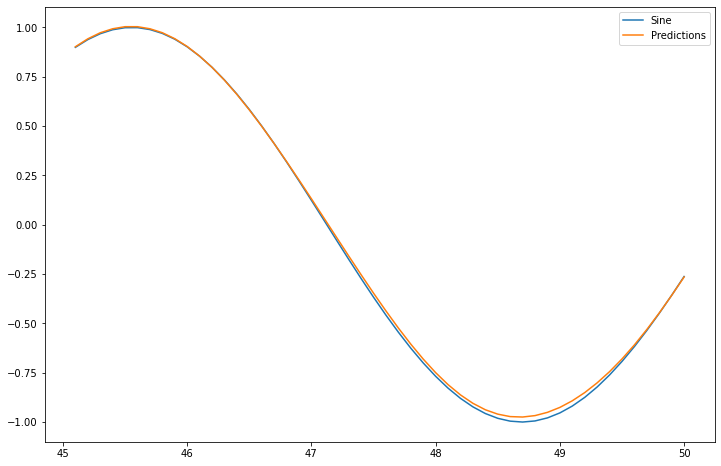

In [69]:
test.plot()

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
earlyStop = EarlyStopping(patience=2, monitor='val_loss')

In [74]:
length = 49
generator = TimeseriesGenerator(scaledTrain, scaledTrain, length=length, batch_size=batchSize)
 
validationGenerator = TimeseriesGenerator(scaledTest, scaledTest,
                                        length=length, batch_size=batchSize)

In [75]:
model = Sequential([
    LSTM(units=50, input_shape=(length, n_feature)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [76]:
model.fit_generator(generator, epochs=20, validation_data= validationGenerator, callbacks=[earlyStop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 402 steps, validate for 1 steps
Epoch 1/20
402/402 [==============================] - 16s 39ms/step - loss: 0.0179 - val_loss: 1.1454e-04
Epoch 2/20
402/402 [==============================] - 10s 26ms/step - loss: 9.9454e-05 - val_loss: 3.9043e-05
Epoch 3/20
402/402 [==============================] - 9s 22ms/step - loss: 9.6085e-05 - val_loss: 1.7353e-04
Epoch 4/20
402/402 [==============================] - 9s 23ms/step - loss: 1.7960e-04 - val_loss: 8.7031e-06
Epoch 5/20
402/402 [==============================] - 10s 24ms/step - loss: 2.4237e-04 - val_loss: 1.1002e-05
Epoch 6/20
402/402 [==============================] - 9s 22ms/step - loss: 2.5150e-04 - val_loss: 3.7394e-06
Epoch 7/20
402/402 [==============================] - 8s 20ms/step - loss: 1.1844e-04 - val_loss: 2.8202e-05
Epoch 8/20
402/402 [==============================] - 9s 22ms/step - loss: 3.6327e-05 - val_loss: 1.7712e-04


In [77]:
test_predictions = []

first_eval_batch = scaledTrain[-length:]
currentBatch = first_eval_batch.reshape(1,length, n_feature)

for i in range(len(test)):
    currentPrediction = model.predict(currentBatch)[0]
    test_predictions.append(currentPrediction)
    currentBatch = np.append(currentBatch[:,1:,:], [[currentPrediction]], axis=1)

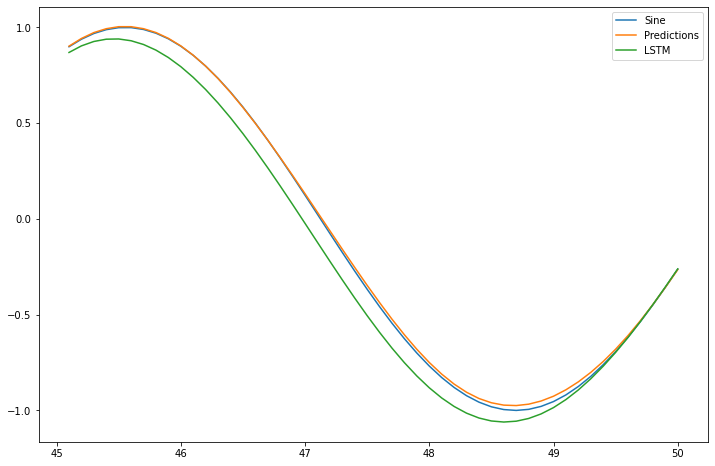

In [78]:
truePredictions = scaler.inverse_transform(test_predictions)
test['LSTM'] = truePredictions
test.plot()

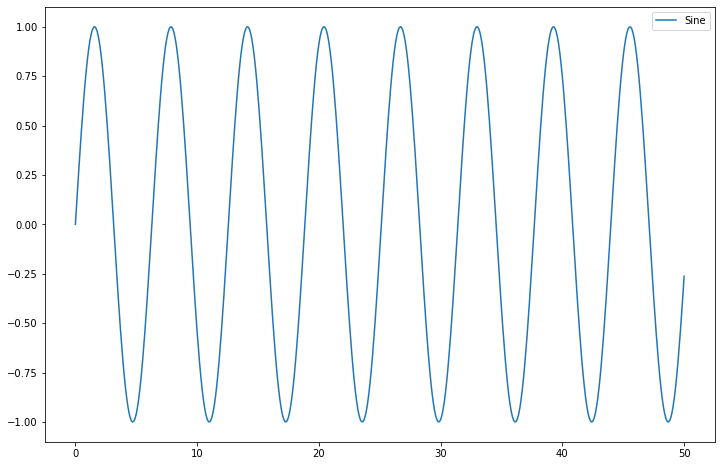

In [79]:
df.plot()

In [80]:
fullScaler = MinMaxScaler()
scaled_full_data = fullScaler.fit_transform(df)

In [81]:
generator =  TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batchSize)

In [82]:
model = Sequential([
    LSTM(units=50, input_shape=(length, n_feature)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [83]:
model.fit_generator(generator, epochs=6)

  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/6
452/452 [==============================] - 15s 33ms/step - loss: 0.0162
Epoch 2/6
452/452 [==============================] - 11s 25ms/step - loss: 2.2392e-04
Epoch 3/6
452/452 [==============================] - 11s 24ms/step - loss: 1.2352e-04
Epoch 4/6
452/452 [==============================] - 12s 27ms/step - loss: 4.8897e-04
Epoch 5/6
452/452 [==============================] - 11s 23ms/step - loss: 1.8891e-04
Epoch 6/6
452/452 [==============================] - 11s 25ms/step - loss: 6.8118e-05


In [84]:
forecast = []

first_eval_batch = scaledTrain[-length:]
currentBatch = first_eval_batch.reshape(1,length, n_feature)

for i in range(25):
    currentPrediction = model.predict(currentBatch)[0]
    forecast.append(currentPrediction)
    currentBatch = np.append(currentBatch[:,1:,:], [[currentPrediction]], axis=1)

In [85]:
forecast = scaler.inverse_transform(forecast)

In [86]:
forecast

array([[ 0.89615208],
       [ 0.93359875],
       [ 0.96098079],
       [ 0.97812056],
       [ 0.98495275],
       [ 0.98152563],
       [ 0.96799715],
       [ 0.94462374],
       [ 0.91175132],
       [ 0.8698043 ],
       [ 0.81927653],
       [ 0.76072116],
       [ 0.69474483],
       [ 0.62200021],
       [ 0.54318562],
       [ 0.45903682],
       [ 0.37032925],
       [ 0.27787091],
       [ 0.18250675],
       [ 0.08510996],
       [-0.01341686],
       [-0.11214872],
       [-0.21013981],
       [-0.3064313 ],
       [-0.40005544]])

In [87]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [88]:
forecastIndex = np.arange(50.1,52.6, step=0.1)

In [89]:
len(forecastIndex)

25

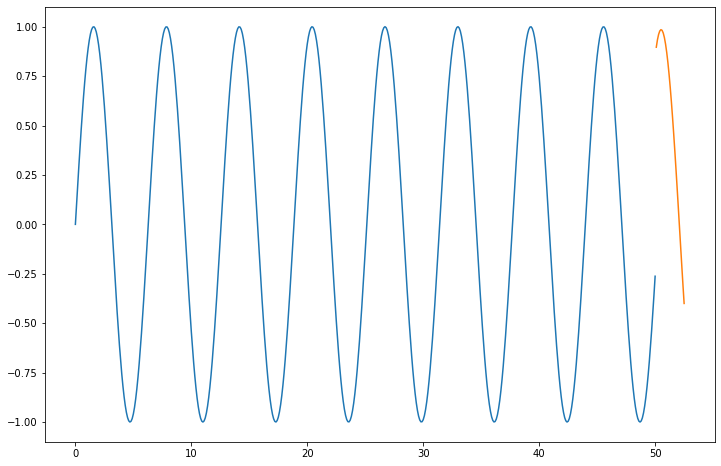

In [94]:
plt.plot(df.index, df['Sine'])
plt.plot(forecastIndex, forecast)